In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [10]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [11]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#这次我们做20层
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
#结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(0.001),
              metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)              

In [13]:
model.layers

In [18]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
with tf.device('/CPU:0'):
    history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3677 - accuracy: 0.8761 - val_loss: 0.4423 - val_accuracy: 0.8456
Epoch 2/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3641 - accuracy: 0.8779 - val_loss: 0.4517 - val_accuracy: 0.8504
Epoch 3/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3526 - accuracy: 0.8795 - val_loss: 0.4417 - val_accuracy: 0.8444
Epoch 4/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3470 - accuracy: 0.8838 - val_loss: 0.4330 - val_accuracy: 0.8544
Epoch 5/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3471 - accuracy: 0.8832 - val_loss: 0.4138 - val_accuracy: 0.8552
Epoch 6/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3467 - accuracy: 0.8821 - val_loss: 0.4807 - val_accuracy: 0.8438
Epoch 7/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3391 - accuracy: 0.8870 - val_loss: 0.4270 -

In [15]:
history.history

{'loss': [2.3017330169677734,
  2.2993781566619873,
  2.2950191497802734,
  2.2853448390960693,
  2.2637743949890137,
  2.2088520526885986,
  2.03695011138916,
  1.546913743019104,
  1.1048015356063843,
  0.9504444599151611,
  0.8777900338172913,
  0.8044156432151794,
  0.756478488445282,
  0.7162677645683289,
  0.6827604174613953,
  0.6560496687889099,
  0.6278110146522522,
  0.6037927269935608,
  0.5845241546630859,
  0.5719491243362427,
  0.5504859089851379,
  0.5366157293319702,
  0.5248487591743469,
  0.5062515139579773,
  0.49357491731643677,
  0.48654407262802124,
  0.4750604033470154,
  0.4630574882030487,
  0.45109397172927856,
  0.44266843795776367,
  0.44084611535072327,
  0.42668408155441284,
  0.41884803771972656,
  0.41365358233451843,
  0.4029243588447571,
  0.3950927257537842,
  0.390304833650589,
  0.3824184238910675,
  0.37739503383636475,
  0.37207508087158203],
 'accuracy': [0.13169090449810028,
  0.11269091069698334,
  0.19096364080905914,
  0.21345454454421997,
  

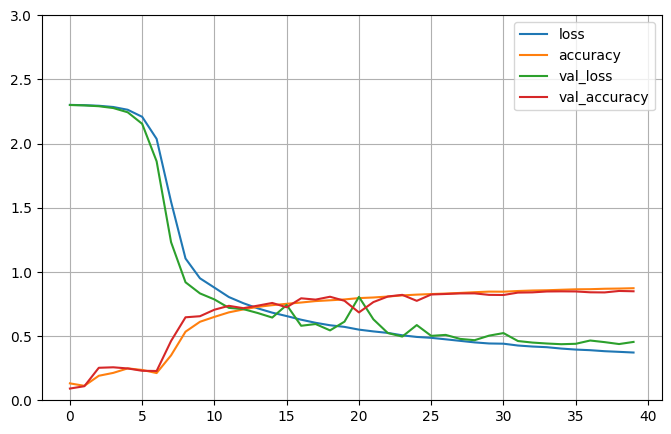

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

#如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [17]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.48554229736328125, 0.833899974822998]